In [1]:
# Importing libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def feature_map(points):
    points = np.array(points)
    x, y = points[:, 0], points[:, 1]

    features = []

    # Degree 1
    features.append(x)
    features.append(y)

    # Degree 2
    features.append(x**2)
    features.append(x*y)
    features.append(y**2)

    # Degree 3
    features.append(x**3)
    features.append((x**2)*y)
    features.append(x*(y**2))
    features.append(y**3)

    # Degree 4
    features.append(x**4)
    features.append((x**3)*y)
    features.append((x**2)*(y**2))
    features.append(x*(y**3))
    features.append(y**4)

    return np.column_stack(features)


In [13]:
class LogisticRegression:

    # Constructor (weights and bias are member variables)
    # Can be accessed via self.weights and self.bias
    def __init__(self) -> None:
        self.weights : np.ndarray | None = None
        self.bias : float | None = None

#todo 2
    def __sigmoid(self, z: np.ndarray) -> np.ndarray:
        return 1 / (1 + np.exp(-z))

#todo 3
    def predict_probability(self, X: np.ndarray) -> np.ndarray:
        z = np.dot(X, self.weights) + self.bias
        return self.__sigmoid(z)

#todo 4
    def predict(self, X: np.ndarray) -> np.ndarray:
        probs = self.predict_probability(X)
        return (probs >= 0.5).astype(int)

#todo5
    def __loss(self, X: np.ndarray, y: np.ndarray, lambda_reg: float = 0) -> tuple:
        m = X.shape[0]

        y_hat = self.predict_probability(X)

        # Binary cross-entropy loss
        loss = -np.mean(y * np.log(y_hat + 1e-9) + (1 - y) * np.log(1 - y_hat + 1e-9))

        # Gradients
        dw = (1 / m) * np.dot(X.T, (y_hat - y))
        db = np.mean(y_hat - y)

        # L2 Regularization
        loss += (lambda_reg / (2 * m)) * np.sum(self.weights ** 2)
        dw += (lambda_reg / m) * self.weights

        return loss, dw, db


#todo7
    def fit(self, X: np.ndarray, y: np.ndarray, epochs: int = 500,
        learning_rate: float = 0.01, threshold: float = 0.0001,
        lambda_reg: float = 1) -> None:

        m, n = X.shape
        self.weights = np.random.randn(n) * 0.01
        self.bias = 0.0

        prev_loss = float("inf")

        for _ in range(epochs):
            loss, dw, db = self.__loss(X, y, lambda_reg)

            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db

            if abs(prev_loss - loss) < threshold:
                break

            prev_loss = loss

In [7]:
# Importing data
df = pd.read_csv('logistic_data.csv')
data = df.to_numpy()
X = data[:, :2]
y = data[:, 2]

In [8]:
# Creating train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
def z_score(X: np.ndarray) -> tuple:
    x_mean = np.mean(X, axis=0)
    x_std = np.std(X, axis=0)
    x = (X - x_mean) / x_std
    return x, x_mean, x_std


In [10]:
# Normalizing the data (we use the same constants to maintain consistency)
X_train, x_mean, x_std = z_score(X_train)
X_test = (X_test - x_mean) / x_std
x_train = feature_map(X_train)
x_test = feature_map(X_test)

In [11]:
# Visualizing how the boundary curve looks like
def plot_decision_boundary(X_original, y, model, resolution=500):
    # Set up the grid for the decision boundary
    x_min, x_max = X_original[:, 0].min() - 1, X_original[:, 0].max() + 1
    y_min, y_max = X_original[:, 1].min() - 1, X_original[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution),
                         np.linspace(y_min, y_max, resolution))

    # Flatten the grid points and map to expanded features
    grid_original = np.c_[xx.ravel(), yy.ravel()]
    grid_expanded = feature_map(grid_original)

    # Predict the grid values for decision boundary
    Z = model.predict(grid_expanded)
    Z = Z.reshape(xx.shape)

    # Plot the data points
    true_points = X_original[y == 1]
    false_points = X_original[y == 0]
    plt.scatter(true_points[:, 0], true_points[:, 1], label="True", c="blue", marker="o", s=20)
    plt.scatter(false_points[:, 0], false_points[:, 1], label="False", c="red", marker="x", s=20)

    # Plot the decision boundary
    plt.contour(xx, yy, Z, levels=[0.5], colors="black", linewidths=2)

    # Labeling and title
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Decision Boundary and Data Points")
    plt.show()

Your model has an accuracy of 90.0%


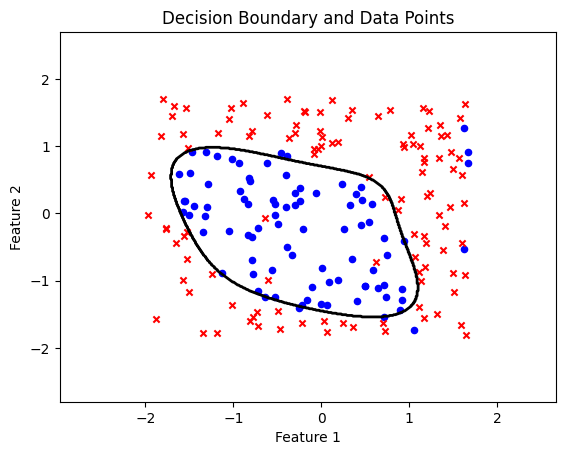

In [14]:
model = LogisticRegression()
model.fit(x_train, y_train, epochs=500, learning_rate=0.01, threshold=0.0001, lambda_reg=1)
y_pred = model.predict(x_test)

accuracy = np.mean(y_pred == y_test) * 100
print(f"Your model has an accuracy of {accuracy}%")

# Plotting the contour and checking for overfitting (try changing the degree in the feature_map function to 10 instead)
plot_decision_boundary(((X - x_mean) / x_std), y, model)